In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Classifying count into low,medium and high
Y = pd.cut(data['cnt'], bins=[0, 3500, 7000, 10000], include_lowest=True, labels=["low", "Medium", "High"])

In [5]:
data['label']=Y

In [6]:
#Create 4 separete season columns with binary data 
data['season1']= data.apply(lambda r: 1 if r.season ==1 else 0, axis=1)
data['season2']= data.apply(lambda r: 1 if r.season ==2 else 0, axis=1)
data['season3']= data.apply(lambda r: 1 if r.season ==3 else 0, axis=1)
data['season4']= data.apply(lambda r: 1 if r.season ==4 else 0, axis=1)

In [7]:
#Create separete month columns with binary data 
data['month1']=data.apply(lambda r:1 if r.mnth==1 else 0,axis=1)
data['month2']=data.apply(lambda r:1 if r.mnth==2 else 0,axis=1)
data['month3']=data.apply(lambda r:1 if r.mnth==3 else 0,axis=1)
data['month4']=data.apply(lambda r:1 if r.mnth==4 else 0,axis=1)
data['month5']=data.apply(lambda r:1 if r.mnth==5 else 0,axis=1)
data['month6']=data.apply(lambda r:1 if r.mnth==6 else 0,axis=1)
data['month7']=data.apply(lambda r:1 if r.mnth==7 else 0,axis=1)
data['month8']=data.apply(lambda r:1 if r.mnth==8 else 0,axis=1)
data['month9']=data.apply(lambda r:1 if r.mnth==9 else 0,axis=1)
data['month10']=data.apply(lambda r:1 if r.mnth==10 else 0,axis=1)
data['month11']=data.apply(lambda r:1 if r.mnth==11 else 0,axis=1)
data['month12']=data.apply(lambda r:1 if r.mnth==12 else 0,axis=1)

In [8]:
#Create separete  weather columns with binary data 
data['weathersit1']=data.apply(lambda r:1 if r.weathersit==1 else 0,axis=1)
data['weathersit2']=data.apply(lambda r:1 if r.weathersit==2 else 0,axis=1)
data['weathersit3']=data.apply(lambda r:1 if r.weathersit==3 else 0,axis=1)

In [9]:
#Create separete  weekday columns with binary data
data['weekday1']=data.apply(lambda r:1 if r.weekday==1 else 0,axis=1)
data['weekday2']=data.apply(lambda r:1 if r.weekday==2 else 0,axis=1)
data['weekday3']=data.apply(lambda r:1 if r.weekday==3 else 0,axis=1)
data['weekday4']=data.apply(lambda r:1 if r.weekday==4 else 0,axis=1)
data['weekday5']=data.apply(lambda r:1 if r.weekday==5 else 0,axis=1)
data['weekday6']=data.apply(lambda r:1 if r.weekday==6 else 0,axis=1)
data['weekday7']=data.apply(lambda r:1 if r.weekday==0 else 0,axis=1)

In [10]:
X = data.drop(['instant','dteday','season','yr','mnth','weekday','weathersit','registered','cnt','casual','label'],axis=1)


In [11]:
X

,holiday,workingday,temp,atemp,hum,windspeed,season1,season2,season3,season4,...,weathersit1,weathersit2,weathersit3,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weekday7
0,0,0,0.344167,0.363625,0.805833,0.160446,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0.363478,0.353739,0.696087,0.248539,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,1,0.196364,0.189405,0.437273,0.248309,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,1,0.200000,0.212122,0.590435,0.160296,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,1,0.226957,0.229270,0.436957,0.186900,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,1,0.254167,0.226642,0.652917,0.350133,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
727,0,1,0.253333,0.255046,0.590000,0.155471,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
728,0,0,0.253333,0.242400,0.752917,0.124383,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
729,0,0,0.255833,0.231700,0.483333,0.350754,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [12]:
Y=pd.DataFrame(data[['label']])

In [13]:
Y.values


array([['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       ['low'],
       [

In [14]:
# Splitting the data as 70% Training and 30% Testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 32)
(220, 32)
(511, 1)
(220, 1)


In [15]:
neighboursnumber = np.linspace(1,10,10)
Accuracy = []
for i in range (1,11): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.values.ravel())
    Accuracy.append(knn.score(X_test, y_test.values.ravel()))

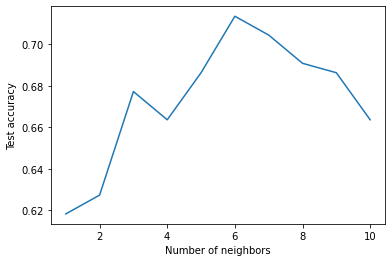

In [16]:
plt.plot(neighboursnumber,Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Test accuracy')
plt.show()

In [17]:
#the model with K=6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=6)

In [18]:
print('Test Accuracy is', knn.score(X_test, y_test)*100,'%')


Test Accuracy is 71.36363636363636 %


In [19]:
y_predict = knn.predict(X_test)
print(confusion_matrix(y_test, y_predict))

[[ 16  18   0]
 [ 11 101   7]
 [  2  25  40]]
